<a href="https://colab.research.google.com/github/sanaomaro/old_notebooks/blob/main/SanaOmarAssignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sb
import io
import requests
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as  plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [ ]:

iurl = "https://raw.githubusercontent.com/SanaOmar/ML/master/Iris.csv"
df_csv = pd.read_csv(iurl, error_bad_lines=False)

In [ ]:
print(df_csv)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [ ]:
df_csv.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_csv.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df_csv.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_csv.shape

(150, 6)

In [ ]:
df = df_csv.sort_values('Species', ascending=False)
df = df.drop_duplicates(subset='Species', keep='first')
print(df)


      Id  SepalLengthCm  ...  PetalWidthCm          Species
149  150            5.9  ...           1.8   Iris-virginica
88    89            5.6  ...           1.3  Iris-versicolor
18    19            5.7  ...           0.3      Iris-setosa

[3 rows x 6 columns]


In [ ]:
df_csv.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [ ]:
corr = df_csv.corr()

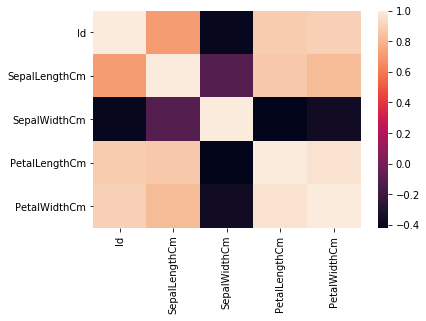

In [ ]:
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

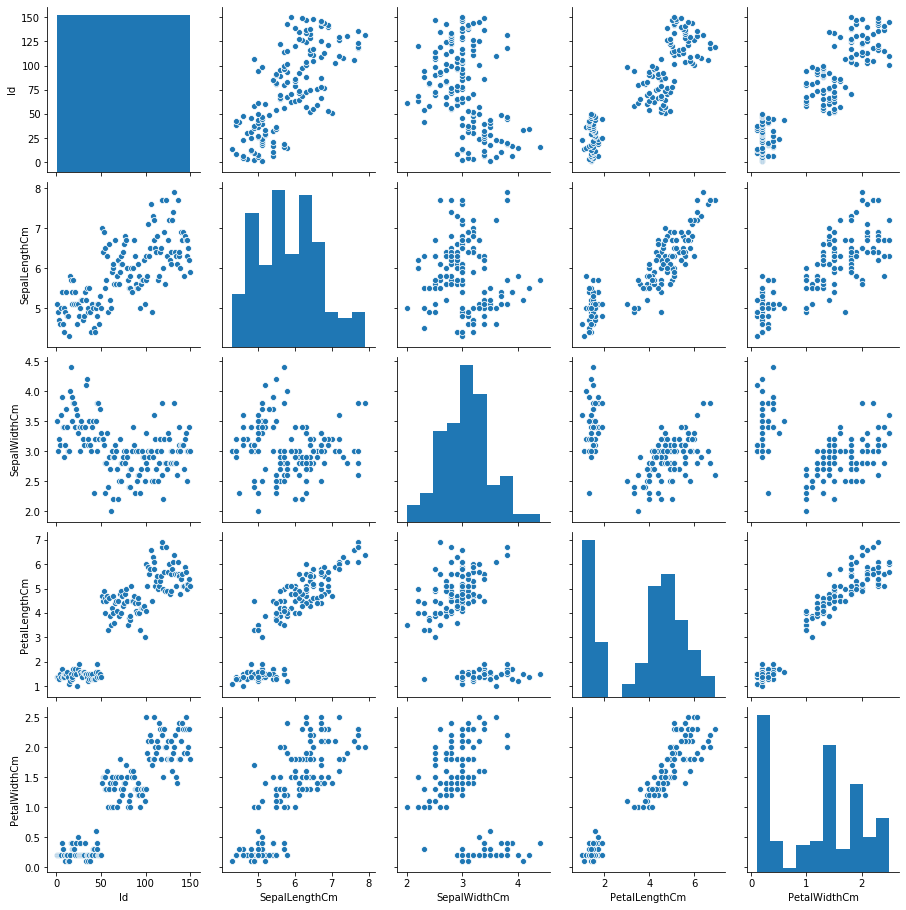

In [ ]:
sb.pairplot(df_csv)

In [ ]:
df_csv.Species.unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [ ]:
y = df_csv.Species

In [ ]:
x = df_csv.drop('Species', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_train.shape

(105, 5)

In [ ]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,20,5.1,3.8,1.5,0.3
18,19,5.7,3.8,1.7,0.3
9,10,4.9,3.1,1.5,0.1
74,75,6.4,2.9,4.3,1.3
51,52,6.4,3.2,4.5,1.5


In [ ]:
x_test.shape

(45, 5)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [ ]:
fitModel = model.fit(x_train, y_train)

In [ ]:
preds =fitModel.predict(x_test)

In [ ]:
print(preds)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica']


In [ ]:
print(confusion_matrix(y_test, preds))

[[17  0  0]
 [ 0 12  0]
 [ 0  0 16]]


In [ ]:
print(accuracy_score(y_test,predictions))

1.0


In [ ]:
features = df_csv.columns
print(features)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


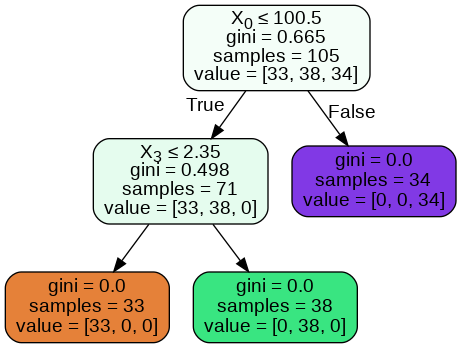

In [ ]:
# Create DOT data

dot_data = tree.export_graphviz(model, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())